In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-and-potability/water_potability.csv


# Data Exploration 

**With respect to the topic I think we can't remove any features because each feature seems to be important**

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [3]:
df = pd.read_csv("/kaggle/input/water-quality-and-potability/water_potability.csv")
df.head(4)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


In [4]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Cleaning Data

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.fillna(0,inplace=True)
filter = (df.ph==0) & (df.Sulfate==0) & (df.Trihalomethanes==0)
df[filter]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
141,0.0,167.386127,20944.620814,4.963124,0.0,566.339294,11.318807,0.0,3.679795,0
201,0.0,229.771350,16162.262307,4.933662,0.0,448.846036,8.816487,0.0,4.600928,0
387,0.0,143.300200,16263.167465,6.229737,0.0,503.664085,19.585497,0.0,3.451740,1
646,0.0,221.620058,11954.700730,6.657053,0.0,391.238714,12.961433,0.0,3.282061,0
929,0.0,202.079864,12519.090660,7.627524,0.0,399.883388,12.748217,0.0,4.439215,0
992,0.0,226.765646,39942.953898,8.594715,0.0,538.621803,13.744749,0.0,4.863378,0
2065,0.0,184.993731,19764.627445,7.505092,0.0,293.477998,12.934160,0.0,3.017985,0
3062,0.0,209.531697,44982.734155,8.898024,0.0,349.385235,15.653299,0.0,3.832479,0
3067,0.0,193.091260,17777.100086,6.087949,0.0,543.114953,10.717588,0.0,3.878664,0


In [12]:
df = df[~filter]
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
mean_ph = df['ph'].mean()

# Replace the rows with 'ph' equal to zero with the mean value
df.loc[df['ph'] == 0, 'ph'] = mean_ph

In [14]:
mean_Sulfate = df['Sulfate'].mean()
df.loc[df['Sulfate']==0,'Sulfate'] = mean_Sulfate

In [15]:
mean_Trihalomethanes = df['Trihalomethanes'].mean()
df.loc[df['Trihalomethanes']==0,'Trihalomethanes'] = mean_Trihalomethanes

**Above I used a trick : first I converted all the NaN values to zero then removed all the values where ph,sulfate and Trihalomethanes are zero at same time and then replaced those zero values with mean value**

# Exploratory Data Analysis (EDA) 

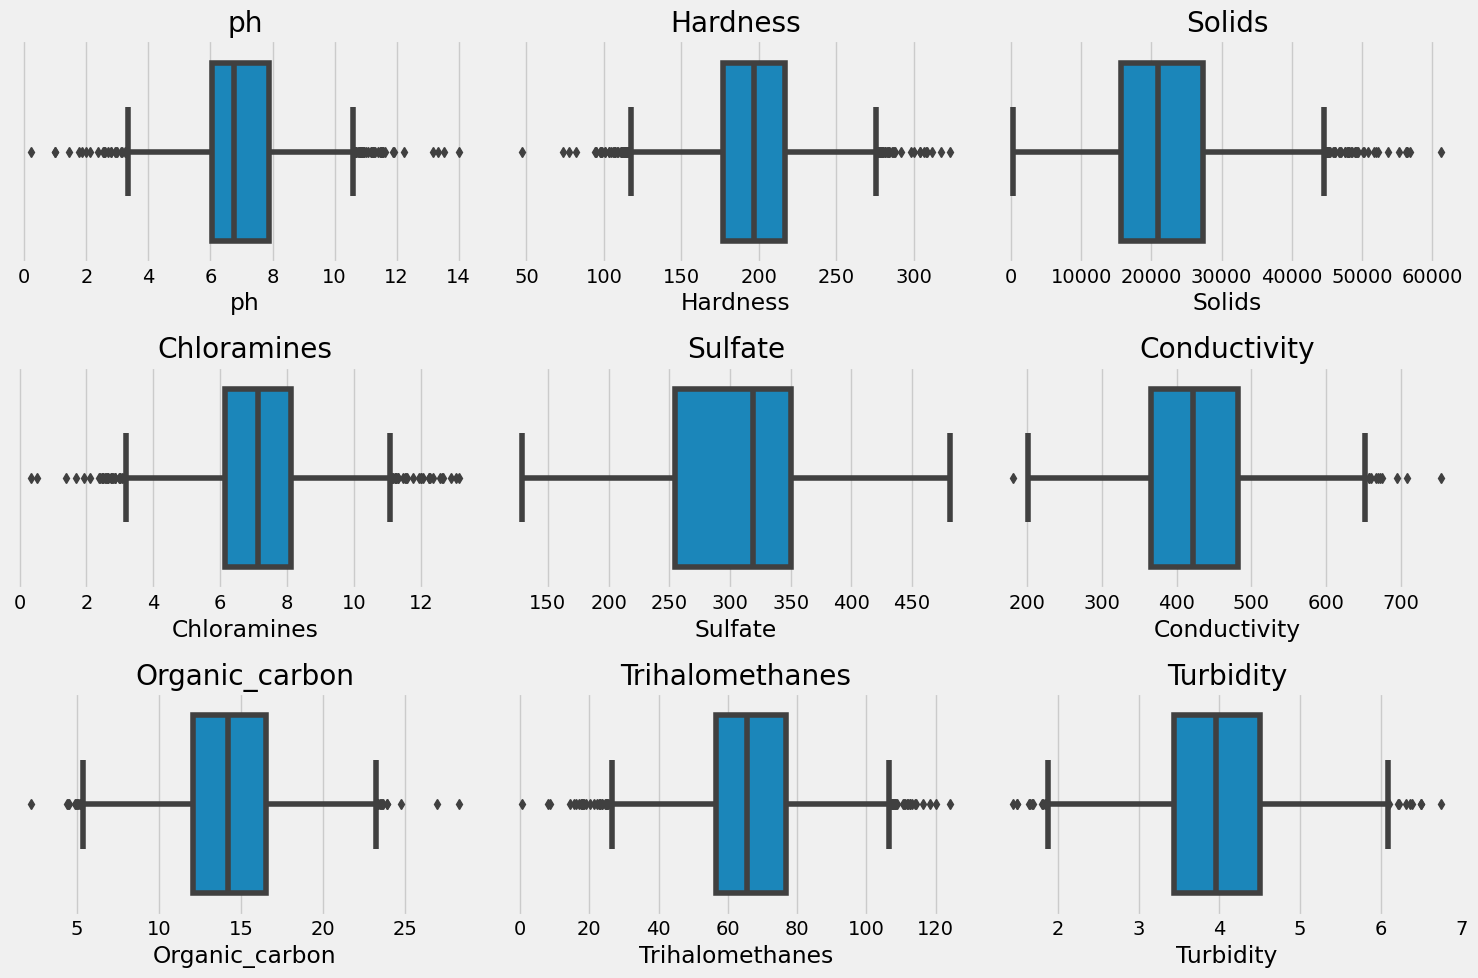

In [16]:

parameters = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(15, 10))

for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i % 9 + 1)  # Adjust the 3x3 grid layout
    sns.boxplot(x=df[parameter])
    plt.title(parameter)
    
    if i % 3 == 2 or i == len(parameters) - 1:
        plt.tight_layout()

plt.show()


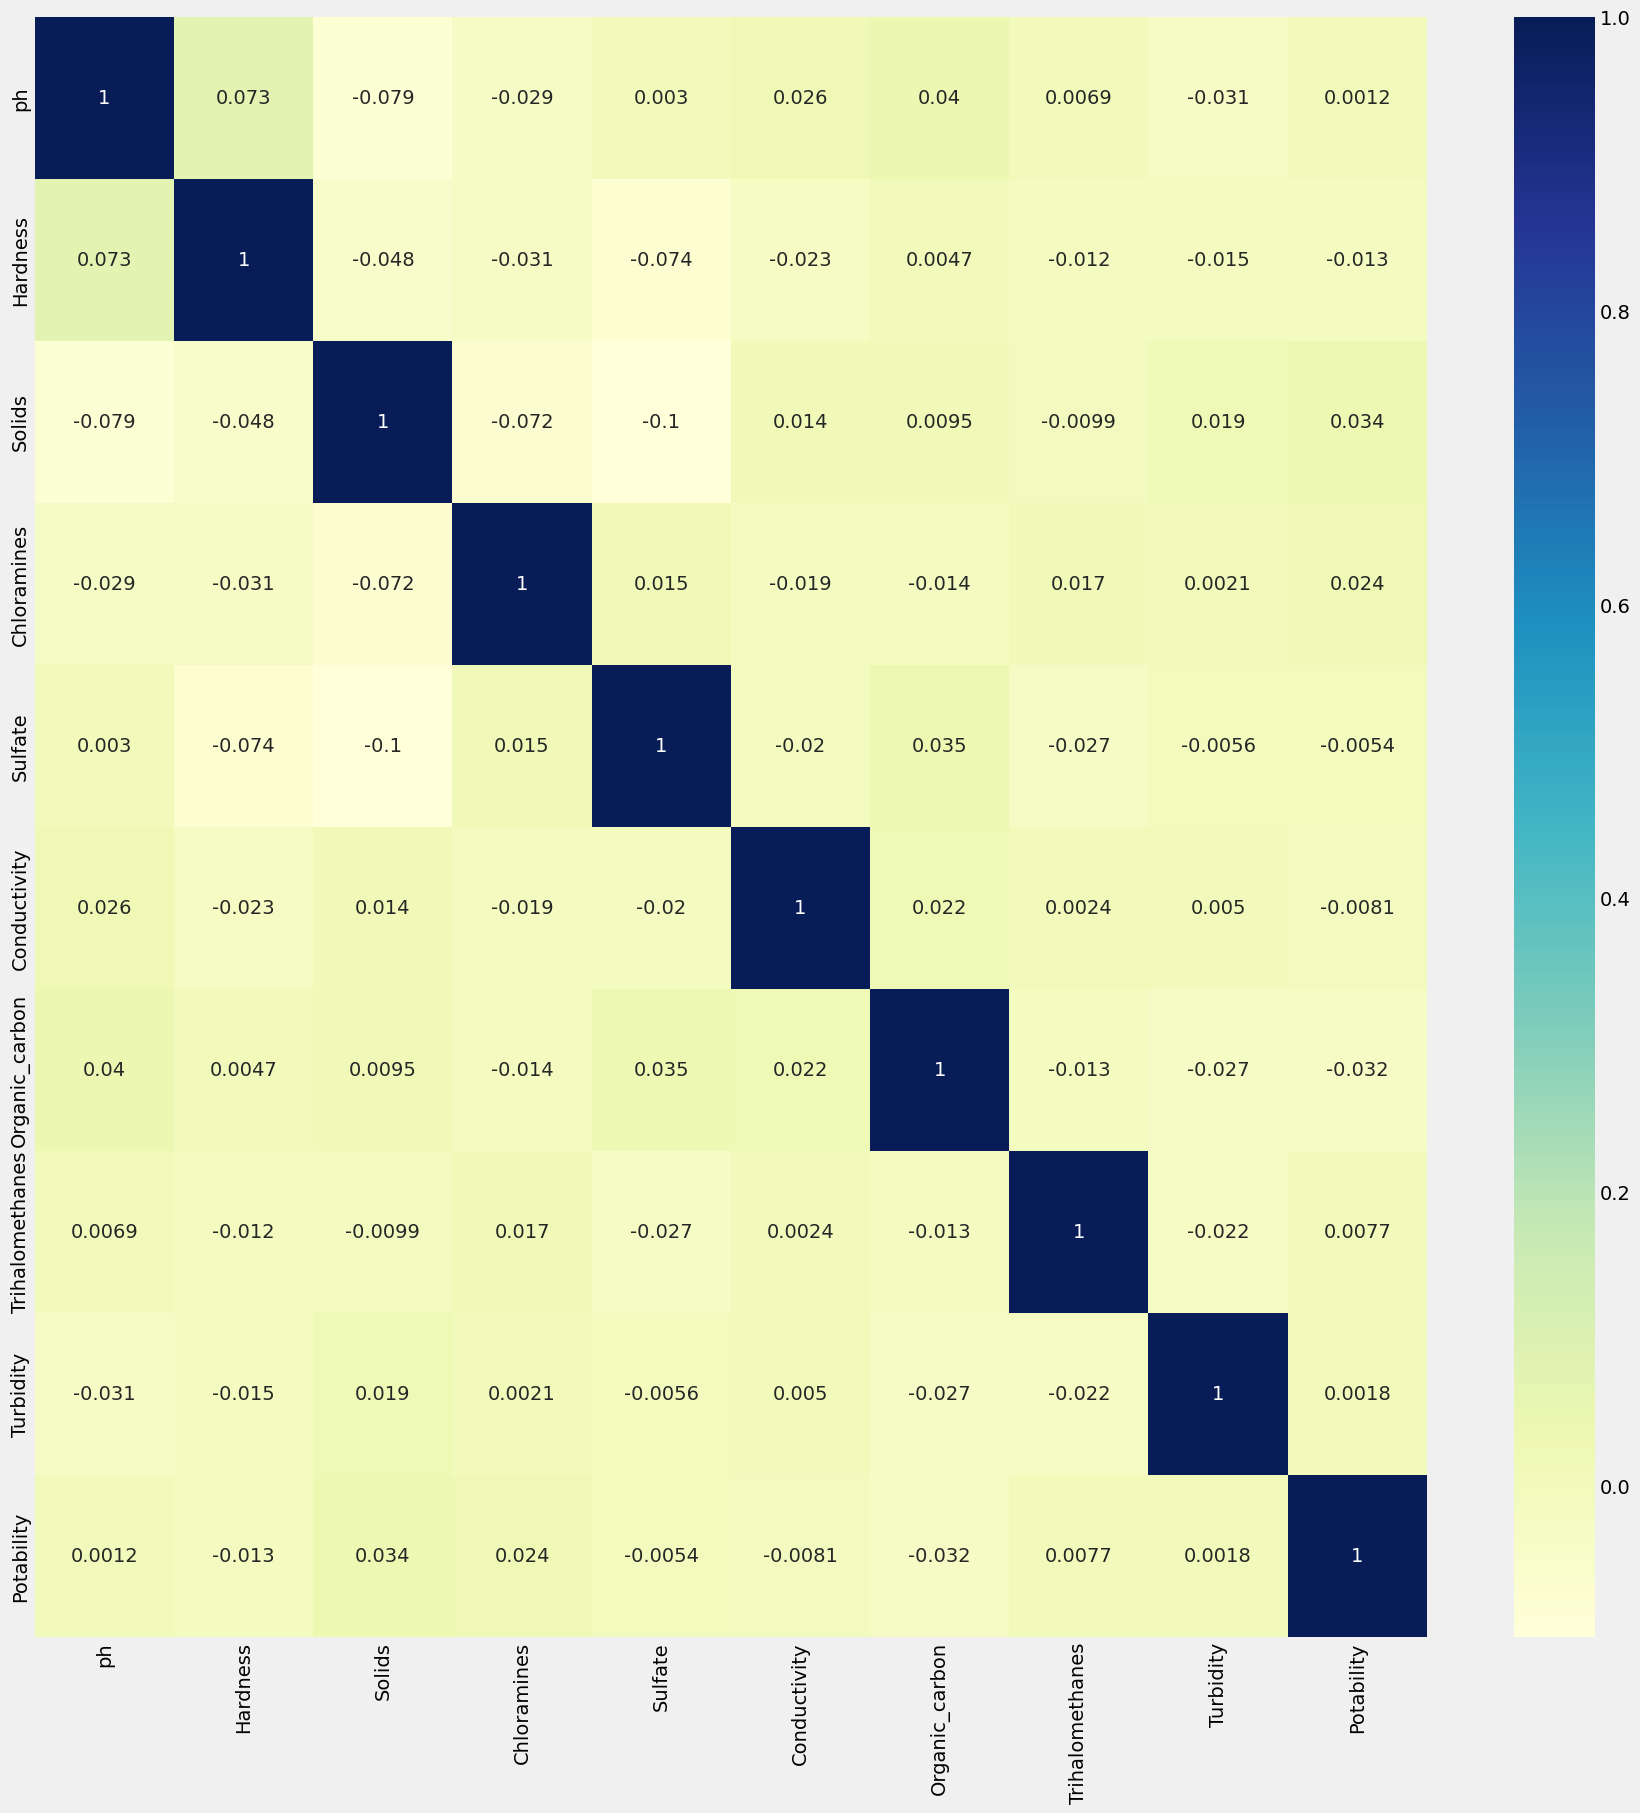

In [17]:
figure = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [18]:
import plotly.graph_objects as go

ph_potable = df[df['Potability'] == 1]['ph']
ph_non_potable = df[df['Potability'] == 0]['ph']

def create_hist(ph_potable, ph_non_potable,title):
    trace2 = go.Histogram(
        x=ph_potable,
        opacity=0.75,
        name='Potable',
        marker=dict(color='green')
    )

    trace1 = go.Histogram(
        x=ph_non_potable,
        opacity=0.75,
        name='Non-Potable',
        marker=dict(color='red')
    )

    layout = go.Layout(barmode='overlay', title_text=f'{title} Histogram by Potability', xaxis=dict(title=f'{title}'), yaxis=dict(title='Frequency'))
    data = [trace1, trace2]
    fig = go.Figure(data=data, layout=layout)
    return fig

create_hist(ph_potable, ph_non_potable,"pH")

### 5.9-6.1 is Non-Potable
### 6.1-6.2 is Potable

In [19]:
ph_potable = df[df['Potability'] == 1]['Hardness']
ph_non_potable = df[df['Potability'] == 0]['Hardness']
create_hist(ph_potable, ph_non_potable,"Hardness")

In [20]:
ph_potable = df[df['Potability'] == 1]['Sulfate']
ph_non_potable = df[df['Potability'] == 0]['Sulfate']
create_hist(ph_potable,ph_non_potable,"Sulfate")

### Perfect Sulphates Range between 250 to 400

In [21]:
ph_potable = df[df['Potability'] == 1]['Conductivity']
ph_non_potable = df[df['Potability'] == 0]['Conductivity']
create_hist(ph_potable,ph_non_potable,"Conductivity")

In [22]:
ph_potable = df[df['Potability'] == 1]['Organic_carbon']
ph_non_potable = df[df['Potability'] == 0]['Organic_carbon']
create_hist(ph_potable,ph_non_potable,"Organic_carbon")

In [23]:
ph_potable = df[df['Potability'] == 1]['Turbidity']
ph_non_potable = df[df['Potability'] == 0]['Turbidity']
create_hist(ph_potable,ph_non_potable,"Turbidity")

**Striclty we can see the data is imbalanced as well as overlapping**

# Spliting Data and Model Building

In [24]:
X = df.drop('Potability', axis=1)
y = df['Potability']

## SMOTE (Synthetic Minority Over-sampling Technique)

In [25]:
y.value_counts()

Potability
0    1990
1    1277
Name: count, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled, y_resampled = sm.fit_resample(X, y)

In [27]:
y_resampled.value_counts()

Potability
0    1990
1    1990
Name: count, dtype: int64

In [28]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30)

In [29]:
X.shape,y.shape

((3267, 9), (3267,))

In [30]:
print(X_train.head(4))
print(X_test.head(4))

            ph    Hardness        Solids  Chloramines     Sulfate  \
264   5.191834  211.094185  14866.103863     7.238691  323.109285   
2644  8.775047  191.526874  21768.640744     4.751005  387.245552   
1768  6.950787  201.805491  21709.647709     6.120771  352.303771   
2828  7.021617  203.201197  12352.811105     6.845744  380.804054   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
264     388.716580       17.780000        83.505406   3.859801  
2644    435.523398       11.875184        56.029098   3.830699  
1768    417.184446       19.683493        49.236809   3.997975  
2828    435.674393       14.507013        68.233386   3.855636  
            ph    Hardness        Solids  Chloramines     Sulfate  \
3842  7.294222  231.890094  15401.721171     8.659799  364.419844   
2453  8.848103  248.567740  19793.971867     9.681154  323.351749   
2727  5.810742  151.876172  25419.551655     7.874166  313.364797   
2871  4.317187  225.514573  27163.457876     6.888136

In [31]:
print(y_train.value_counts())
print(y_test.value_counts())

Potability
0    1401
1    1385
Name: count, dtype: int64
Potability
1    605
0    589
Name: count, dtype: int64


**Logistic Regression doesn't work good with outliers**

In [32]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.507537688442211
Confusion Matrix : 
[[340 249]
 [339 266]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.58      0.54       589
           1       0.52      0.44      0.48       605

    accuracy                           0.51      1194
   macro avg       0.51      0.51      0.51      1194
weighted avg       0.51      0.51      0.51      1194



In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.592964824120603
Confusion Matrix : 
[[326 263]
 [223 382]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       589
           1       0.59      0.63      0.61       605

    accuracy                           0.59      1194
   macro avg       0.59      0.59      0.59      1194
weighted avg       0.59      0.59      0.59      1194



In [34]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.6139028475711893
Confusion Matrix : 
[[362 227]
 [234 371]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       589
           1       0.62      0.61      0.62       605

    accuracy                           0.61      1194
   macro avg       0.61      0.61      0.61      1194
weighted avg       0.61      0.61      0.61      1194



**Bagging**

In [35]:
rd_clf = RandomForestClassifier(criterion = "entropy")
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.6708542713567839
Confusion Matrix : 
[[421 168]
 [225 380]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       589
           1       0.69      0.63      0.66       605

    accuracy                           0.67      1194
   macro avg       0.67      0.67      0.67      1194
weighted avg       0.67      0.67      0.67      1194



**Ensemble Technique**

In [36]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6080402010050251
Confusion Matrix : 
[[363 226]
 [242 363]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       589
           1       0.62      0.60      0.61       605

    accuracy                           0.61      1194
   macro avg       0.61      0.61      0.61      1194
weighted avg       0.61      0.61      0.61      1194



In [37]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.6658291457286433
Confusion Matrix : 
[[410 179]
 [220 385]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       589
           1       0.68      0.64      0.66       605

    accuracy                           0.67      1194
   macro avg       0.67      0.67      0.67      1194
weighted avg       0.67      0.67      0.67      1194



In [38]:
cat = CatBoostClassifier(iterations=50)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.248877
0:	learn: 0.6801081	total: 60.3ms	remaining: 2.96s
1:	learn: 0.6700797	total: 62.8ms	remaining: 1.51s
2:	learn: 0.6644037	total: 65ms	remaining: 1.02s
3:	learn: 0.6563111	total: 67ms	remaining: 771ms
4:	learn: 0.6506561	total: 69.1ms	remaining: 622ms
5:	learn: 0.6442997	total: 71.2ms	remaining: 522ms
6:	learn: 0.6400362	total: 73.2ms	remaining: 450ms
7:	learn: 0.6380390	total: 75ms	remaining: 394ms
8:	learn: 0.6330910	total: 76.9ms	remaining: 350ms
9:	learn: 0.6269910	total: 78.7ms	remaining: 315ms
10:	learn: 0.6221064	total: 79.7ms	remaining: 283ms
11:	learn: 0.6191418	total: 81.6ms	remaining: 258ms
12:	learn: 0.6113393	total: 83.5ms	remaining: 238ms
13:	learn: 0.6080374	total: 85.4ms	remaining: 220ms
14:	learn: 0.6045674	total: 87.4ms	remaining: 204ms
15:	learn: 0.6004942	total: 89.4ms	remaining: 190ms
16:	learn: 0.5984056	total: 91.3ms	remaining: 177ms
17:	learn: 0.5932866	total: 93.4ms	remaining: 166ms
18:	learn: 0.5878570	total: 95.5ms	remaining: 156m

In [39]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier', 'XgBoost', 'Cat Boost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_xgb, acc_cat]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.670854
5,XgBoost,0.665829
6,Cat Boost,0.647404
2,Decision Tree Classifier,0.613903
4,Ada Boost Classifier,0.608040
1,KNN,0.592965
0,Logistic Regression,0.507538


In [40]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

**Things Left To Try : 1. Scaling, 2. Hyperparameter Tunning 3. Frontend**


**Thank you!**